In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("game-data.xlsx")
df.head()

,Unnamed: 0,game_id,gameName,ach_count,playtime_forever,date-time,date,time,type,price ($),steamId,achievements,stats
0,29,218620,PAYDAY 2,84,2215,2018-12-16 20:30:41,2018-12-16 20:30:41,2018-12-16 20:30:41,Action,9.99,76561198276108416,"[{'name': 'how_do_you_like_me_now', 'achieved'...","[{'name': 'player_time_0h', 'value': 0}, {'nam..."
1,69,976730,Halo: The Master Chief Collection,56,1139,2020-06-03 08:22:24,2020-06-03 08:22:24,2020-06-03 08:22:24,Action,39.99,76561198276108416,"[{'name': '1_1_JUST_GETTING_STARTED', 'achieve...",NaN
2,46,377160,Fallout 4,38,1252,2019-02-15 13:43:10,2019-02-15 13:43:10,2019-02-15 13:43:10,RPG,19.99,76561198276108416,"[{'name': 'NEW_ACHIEVEMENT_1_0', 'achieved': 1...",NaN
3,22,304930,Unturned,32,1573,2019-03-19 15:27:58,2019-03-19 15:27:58,2019-03-19 15:27:58,Action,0.00,76561198276108416,"[{'name': 'PEI', 'achieved': 1}, {'name': 'Mas...","[{'name': 'Kills_Zombies_Normal', 'value': 263..."
4,34,201810,Wolfenstein: The New Order,28,5,2019-07-07 16:46:41,2019-07-07 16:46:41,2019-07-07 16:46:41,Action,19.99,76561198276108416,"[{'name': 'ach_1', 'achieved': 1}, {'name': 'a...",NaN


In [14]:
print("Shape of the Dataset:",df.shape)
print("The count of games that I pleyed:",df.shape[0])
print("The count of features:",df.shape[1])
df.info()

Shape of the Dataset: (64, 13)
The count of games that I pleyed: 64
The count of features: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        64 non-null     int64         
 1   game_id           64 non-null     int64         
 2   gameName          64 non-null     object        
 3   ach_count         64 non-null     int64         
 4   playtime_forever  64 non-null     int64         
 5   date-time         64 non-null     datetime64[ns]
 6   date              64 non-null     datetime64[ns]
 7   time              64 non-null     datetime64[ns]
 8   type              64 non-null     object        
 9   price ($)         64 non-null     float64       
 10  steamId           64 non-null     int64         
 11  achievements      39 non-null     object        
 12  stats             18 non-null     object  

In [15]:
# Measures of Central Tendency, mean, median, mod
from statistics import mode, median
import numpy as np

mean_ach_count = np.mean(df["ach_count"])
print("mean of ach_count:",mean_ach_count)
mean_playtime_forever = np.mean(df["playtime_forever"])
print("mean of playtime_forever:",mean_playtime_forever)
mean_price = np.mean(df["price ($)"])
print("mean of price:",mean_price)

median_ach_count = np.median(df["ach_count"])
print("median of ach_count:",median_ach_count)
median_playtime_forever = np.median(df["playtime_forever"])
print("median of playtime_forever:",median_playtime_forever)
median_price = np.median(df["price ($)"])
print("median of price:",median_price)

mode_ach_count = mode(df["ach_count"])
mode_playtime_forever = mode(df["playtime_forever"])
mode_price = mode(df["price ($)"])
print("mode of ach_count:",median_ach_count)
print("mode of playtime_forever:",median_playtime_forever)
print("mode of price:",median_price)

mean of ach_count: 10.734375
mean of playtime_forever: 758.703125
mean of price: 18.876406250000002
median of ach_count: 4.0
median of playtime_forever: 150.5
median of price: 19.99
mode of ach_count: 4.0
mode of playtime_forever: 150.5
mode of price: 19.99


In [16]:
# grafik türleri
# 1. sütun grafiği, plt.bar; farklı değişkenlerin birbiri ile karşılaştırmasında
# 2. çizgi grafiği, plt.plot; ayne değişkenin zamanla değişimini inceler
# 3. pasta grafiği, plt.pie; bir bütnün parçalarının gösterilmesi
# 4. yanyana sütunlar, plt.bar, farklı değerler, zamanla nasıl değişir
# 5. scatter grafiği, plt.scatter, değişkenin konum ve büyüklüğünü karşılaştırır.

In [17]:
# EDA methods
# 1) Hangi tür oyunları daha fazla oynuyorum,
# 2) oynama zamanı ve achievement count arası korelasyon
# 3) Oyun türü ve fiyatı
# 4) en başarılı olduğum oyun türü
# 5) oynadığım oyunun toplam saati / fiyat -> en çok verim aldığım oyun hangisi
# 6) fiyat başarı oranı

Text(0.5, 1.0, 'Total Count of Game Types I have played')

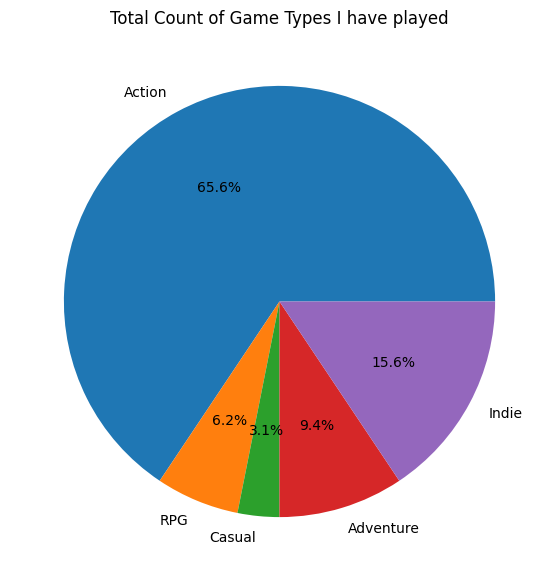

In [18]:
# 1) Hangi tür oyunları daha fazla oynuyorum,


d = dict()
for ind in df.index:
  genre = df["type"][ind]
  if genre in d.keys():
    d[genre] += 1
  else:
    d[genre] = 1

x = d.keys()
y = [d[ind] for ind in d.keys()]

fig1, ax1 = plt.subplots(figsize=(14,7))

ax1.pie(y,labels=x,autopct='%1.1f%%');
plt.title('Total Count of Game Types I have played')

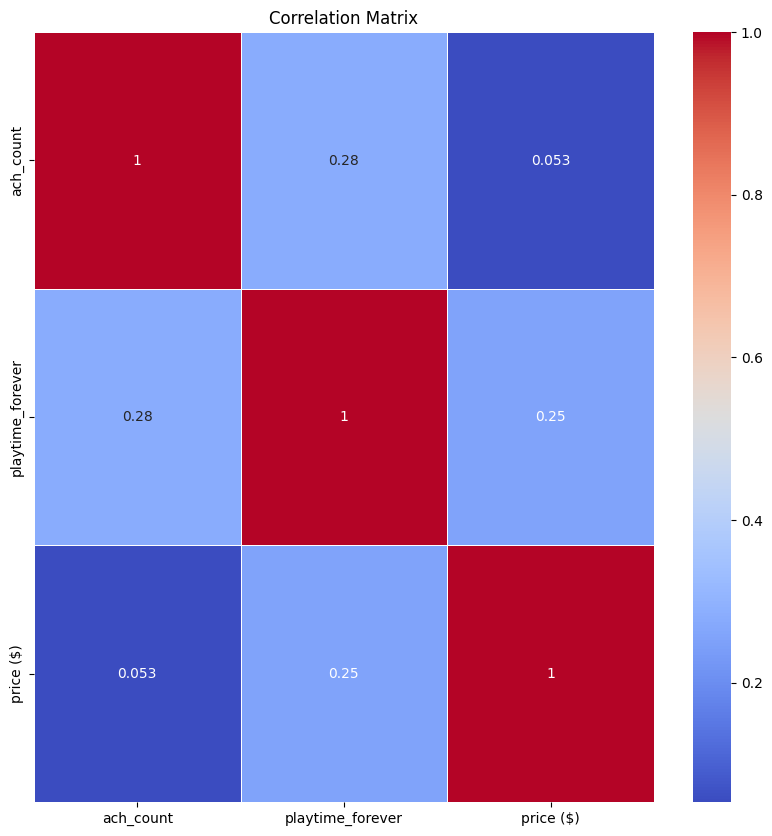

In [19]:
# 2) oynama zamanı ve achievement count arası korelasyon
import seaborn as sns
df2 = df[["ach_count","playtime_forever","price ($)"]]
cor = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,cmap="coolwarm",linewidth=.5)
plt.title("Correlation Matrix")
plt.show()

# there is no meaningfull correlation among ["ach_count","playtime_forever","prize ($)"]

type
Action       20.88881
Adventure    14.56500
Casual        4.99500
Indie        13.34100
RPG          24.99250
Name: price ($), dtype: float64


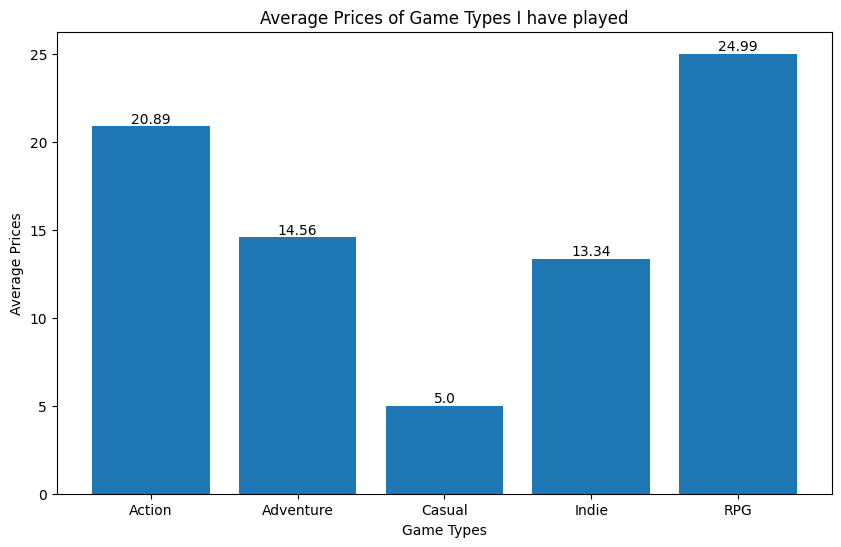

In [20]:
# 3) Oyun türü ve fiyatı
avg_prices = df.groupby("type")["price ($)"].mean()
print(avg_prices)

x = avg_prices.keys()
y = [avg_prices[ind] for ind in avg_prices.keys()]
plt.figure(figsize=(10, 6))
bars = plt.bar(x,y)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Types')
plt.ylabel('Average Prices')
plt.title('Average Prices of Game Types I have played')

# Grafiği göster
plt.show()

type
Action       13.642857
Adventure     1.500000
Casual        7.000000
Indie         1.200000
RPG          19.750000
Name: ach_count, dtype: float64


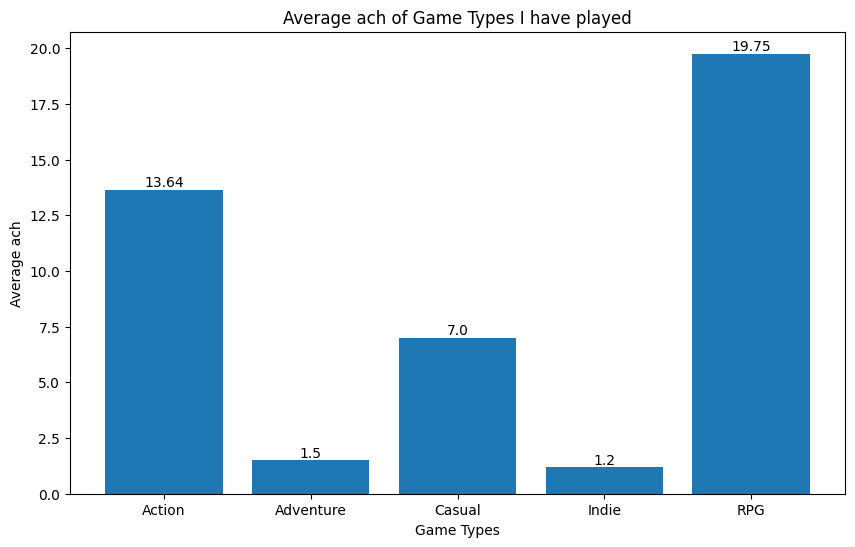

In [21]:
# 4) en başarılı olduğum oyun türü
avg_ach = df.groupby("type")["ach_count"].mean()
print(avg_ach)

x = avg_ach.keys()
y = [avg_ach[ind] for ind in avg_ach.keys()]
plt.figure(figsize=(10, 6))
bars = plt.bar(x,y)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Types')
plt.ylabel('Average ach')
plt.title('Average ach of Game Types I have played')

# Grafiği göster
plt.show()

In [22]:
# mapping
type_map = {'Action': 1,
            'Adventure': 2,
            'Aktion': 1,
            'Casual':3,
            'Indie':4,
            'RPG':5,
            'Racing':6,
            'Simulation':7,
            'Strategy':8}

df['type'] = df['type'].map(type_map)

In [23]:
# 5) oynadığım oyunun toplam saati / fiyat -> en çok verim aldığım oyun hangisi
df3 = df[df["price ($)"]>0];
df3 = df3.dropna()
df3["efficiency"] = (df["playtime_forever"]/df["price ($)"])
df3.sort_values(by="efficiency",inplace=True,ascending=False)
df3[["efficiency","gameName","type","price ($)","playtime_forever"]].head()

,efficiency,gameName,type,price ($),playtime_forever
0,221.721722,PAYDAY 2,1,9.99,2215
9,215.402567,Battlefield™ 2042,1,59.99,12922
34,141.883768,Euro Truck Simulator 2,4,4.99,708
27,69.251337,Call to Arms,1,3.74,259
16,55.527764,The Forest,1,19.99,1110


In [24]:
# 6) fiyat başarı oranı
df4 = df[(df["ach_count"]>1) & (df["gameName"] is not None)]
df4["rate"] = 100*(df4["price ($)"]/df4["ach_count"])
df4.sort_values(by="rate",inplace=True,ascending=False)
df4[["rate","gameName","type","price ($)","ach_count"]].head()

<ipython-input-24-9a58b4728d43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["rate"] = 100*(df4["price ($)"]/df4["ach_count"])
<ipython-input-24-9a58b4728d43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.sort_values(by="rate",inplace=True,ascending=False)


,rate,gameName,type,price ($),ach_count
29,499.833333,Sherlock Holmes: The Devil's Daughter,1,29.99,6
31,499.750000,Mount&Blade: Warband,1,19.99,4
19,352.882353,Cyberpunk 2077,5,59.99,17
17,333.277778,Call of Duty: WWII,1,59.99,18
35,333.000000,Garry's Mod,3,9.99,3


In [25]:
df['type'] = pd.Categorical(df['type'])
df['type'] = df['type'].cat.codes
df_ml_data = df[["ach_count","playtime_forever","type","price ($)"]]
df_ml_data.head()




,ach_count,playtime_forever,type,price ($)
0,84,2215,0,9.99
1,56,1139,0,39.99
2,38,1252,4,19.99
3,32,1573,0,0.00
4,28,5,0,19.99


In [26]:
# Data Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

dependent = ["playtime_forever","type","price ($)"]
independent = ['ach_count']
shuffled_data = shuffle(df_ml_data, random_state=61)

y = shuffled_data[independent]
X = shuffled_data[dependent]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51, 3)
X_test shape: (13, 3)
y_train shape: (51, 1)
y_test shape: (13, 1)


2/2 [==============================] - 0s 80ms/step - loss: 49.5665 - val_loss: 638.1431


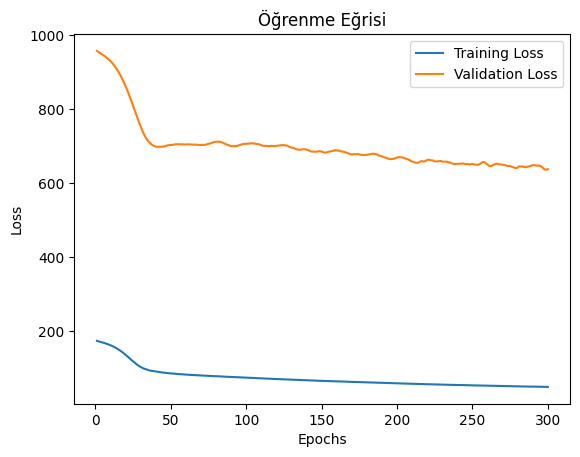

In [27]:
# ML-model = Artificial Neural Network
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay Sinir Ağı Modeli Oluşturma
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Modeli Derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli Eğitme
epochs = 300
train_losses = []
test_losses = []
for epoch in range(epochs):
    history = model.fit(X_train,
                        y_train,
                        epochs=1,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=1)

    train_loss = history.history['loss'][0]
    test_loss = history.history['val_loss'][0]

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Öğrenme Eğrisini Çizme
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Validation Loss')
plt.title('Öğrenme Eğrisi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

# # Modelin Test Seti Üzerinde Performansını Değerlendirme
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

Mean Squared Error: 702.7692307692307
Decision Tree Rules:
 |--- playtime_forever <= -0.33
|   |--- playtime_forever <= -0.40
|   |   |--- value: [0.00]
|   |--- playtime_forever >  -0.40
|   |   |--- playtime_forever <= -0.40
|   |   |   |--- price ($) <= -0.21
|   |   |   |   |--- value: [0.00]
|   |   |   |--- price ($) >  -0.21
|   |   |   |   |--- value: [28.00]
|   |   |--- playtime_forever >  -0.40
|   |   |   |--- type <= 1.79
|   |   |   |   |--- price ($) <= -1.08
|   |   |   |   |   |--- value: [11.00]
|   |   |   |   |--- price ($) >  -1.08
|   |   |   |   |   |--- price ($) <= -0.06
|   |   |   |   |   |   |--- playtime_forever <= -0.34
|   |   |   |   |   |   |   |--- type <= 0.72
|   |   |   |   |   |   |   |   |--- price ($) <= -0.24
|   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |--- price ($) >  -0.24
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- type >  0.72
|   |   |   |   |   |   |   

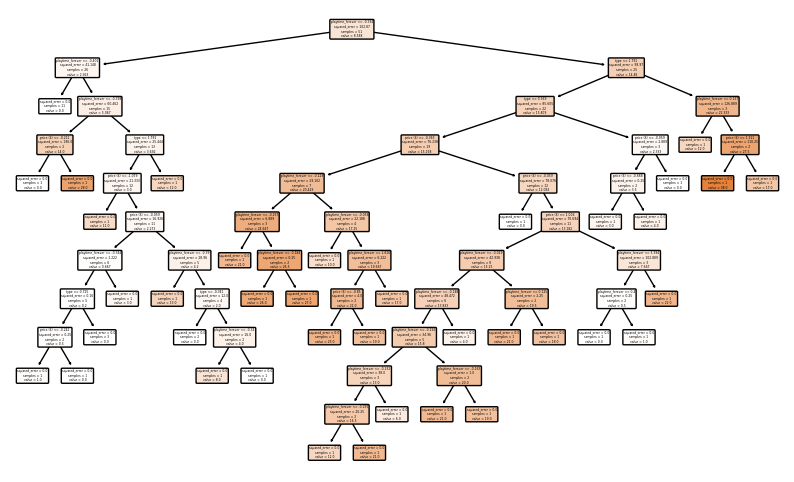

In [28]:
from sklearn.tree import DecisionTreeRegressor
# Karar Ağacı Regresyon Modeli Oluşturma
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Modelin Performansını Değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Karar Ağacını Görselleştirme
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Karar Ağacını Görselleştirme
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()